# Gerekli kütüphaneleri yükleme

In [1]:
!pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import glob
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Dosyaları içe aktarma

In [2]:
df1 = pd.read_csv("Sales_January_2019.csv")
df2 = pd.read_csv("Sales_February_2019.csv")
df3 = pd.read_csv("Sales_March_2019.csv")
df4 = pd.read_csv("Sales_April_2019.csv")
df5 = pd.read_csv("Sales_May_2019.csv")
df6 = pd.read_csv("Sales_June_2019.csv")
df7 = pd.read_csv("Sales_July_2019.csv")
df8 = pd.read_csv("Sales_August_2019.csv")
df9 = pd.read_csv("Sales_September_2019.csv")
df10 = pd.read_csv("Sales_October_2019.csv")
df11 = pd.read_csv("Sales_November_2019.csv")
df12 = pd.read_csv("Sales_December_2019.csv")

# Dosya içeriklerini görüntüleme

In [3]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [4]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
12032,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
12033,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
12034,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [5]:
df3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [6]:
df4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [7]:
df5

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


In [8]:
df6

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [9]:
df7

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
...,...,...,...,...,...,...
14366,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
14367,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
14368,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
14369,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


In [10]:
df8

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.99,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016"
12007,248147,AAA Batteries (4-pack),3,2.99,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215"
12008,248148,AA Batteries (4-pack),1,3.84,08/02/19 07:25,"568 13th St, Seattle, WA 98101"
12009,248149,USB-C Charging Cable,1,11.95,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016"


In [11]:
df9

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [12]:
df10

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [13]:
df11

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
17656,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001"
17657,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301"
17658,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215"
17659,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215"


In [14]:
df12

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Dosyaları birleştirme ve yeni DataFrame oluşturma

In [15]:
year = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [16]:
df = pd.concat(year)

In [17]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# Veri ön işleme

In [18]:
# Verinin genel bilgilerini gösterme
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [19]:
# Eksik değerleri kontrol etme
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [20]:
# Eksik değerleri içeren satırları çıkarma
df.dropna(axis = 0, inplace = True)

In [21]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [22]:
# Verideki "Price Each" sütununu sayısal formata dönüştürme
df["Price Each"] = df["Price Each"].apply(pd.to_numeric, errors = "coerce")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.9+ MB


In [24]:
df.isnull().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each          355
Order Date            0
Purchase Address      0
dtype: int64

In [25]:
df.dropna(axis = 0, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), object(5)
memory usage: 9.9+ MB


In [27]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [28]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [29]:
# "Quantity Ordered" sütununu tam sayıya dönüştürme
df[['Quantity Ordered']] = df[['Quantity Ordered']].astype(int)

In [30]:
# "Order Date" sütununu tarih/saat formatına dönüştürme
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%m/%d/%y %H:%M')

In [31]:
# Yeni bir "Month" sütunu ekleyerek ayları almak
df["Month"] = df["Order Date"].dt.month

In [32]:
df.drop(["Order Date"], axis = 1, inplace = True)

In [33]:
df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
0,141234,iPhone,1,700.00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400.00,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,"778 River St, Dallas, TX 75001",12


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Purchase Address  185950 non-null  object 
 5   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.9+ MB


In [35]:
df.drop(["Order ID", "Purchase Address"], axis = 1, inplace = True)

In [36]:
# "Product" sütunundaki değerleri ve ne kadar tekrar ettiklerini belirleme
df["Product"].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [37]:
# Kategorik verileri nümerik verilere dönüştürme
df.Product[df.Product == "USB-C Charging Cable"] = 0
df.Product[df.Product == "Lightning Charging Cable"] = 1
df.Product[df.Product == "AAA Batteries (4-pack)"] = 2
df.Product[df.Product == "AA Batteries (4-pack)"] = 3
df.Product[df.Product == "Wired Headphones"] = 4
df.Product[df.Product == "Apple Airpods Headphones"] = 5
df.Product[df.Product == "Bose SoundSport Headphones"] = 6
df.Product[df.Product == "27in FHD Monitor"] = 7
df.Product[df.Product == "iPhone"] = 8
df.Product[df.Product == "27in 4K Gaming Monitor"] = 9
df.Product[df.Product == "34in Ultrawide Monitor"] = 10
df.Product[df.Product == "Google Phone"] = 11
df.Product[df.Product == "Flatscreen TV"] = 12
df.Product[df.Product == "Macbook Pro Laptop"] = 13
df.Product[df.Product == "ThinkPad Laptop"] = 14
df.Product[df.Product == "20in Monitor"] = 15
df.Product[df.Product == "Vareebadd Phone"] = 16
df.Product[df.Product == "LG Washing Machine"] = 17
df.Product[df.Product == "LG Dryer"] = 18

<ipython-input-37-c2c32aa47809>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Product[df.Product == "USB-C Charging Cable"] = 0
<ipython-input-37-c2c32aa47809>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Product[df.Product == "Lightning Charging Cable"] = 1
<ipython-input-37-c2c32aa47809>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Product[df.Product == "AAA Batteries (4-pack)"] = 2
<ipython-input-37-c2c32aa47809>

In [38]:
df

,Product,Quantity Ordered,Price Each,Month
0,8,1,700.00,1
1,1,1,14.95,1
2,4,2,11.99,1
3,7,1,149.99,1
4,4,1,11.99,1
...,...,...,...,...
25112,1,1,14.95,12
25113,3,2,3.84,12
25114,16,1,400.00,12
25115,4,1,11.99,12


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.1+ MB


In [40]:
df["Product"] = df["Product"].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  int64  
 1   Quantity Ordered  185950 non-null  int64  
 2   Price Each        185950 non-null  float64
 3   Month             185950 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 7.1 MB


In [42]:
# Yeni bir "Sales" sütunu ekleyerek satışları hesaplama
df['Sales Amount'] = df['Quantity Ordered'] * df['Price Each']

In [43]:
# Ay ve ürün bazında toplam satış miktarını hesaplama
grouped_df = df.groupby(['Month', 'Product']).sum().reset_index()

In [44]:
print(grouped_df)

     Month  Product  Quantity Ordered  Price Each  Sales Amount
0        1        0              1287    14029.30      15379.65
1        1        1              1155    16011.45      17267.25
2        1        2              1600     3241.16       4784.00
3        1        3              1424     3985.92       5468.16
4        1        4              1085    12061.94      13009.15
..     ...      ...               ...         ...           ...
223     12       14               539   538994.61     538994.61
224     12       15               569    62364.33      62584.31
225     12       16               284   113600.00     113600.00
226     12       17                80    48000.00      48000.00
227     12       18                86    51600.00      51600.00

[228 rows x 5 columns]


In [45]:
df

,Product,Quantity Ordered,Price Each,Month,Sales Amount
0,8,1,700.00,1,700.00
1,1,1,14.95,1,14.95
2,4,2,11.99,1,23.98
3,7,1,149.99,1,149.99
4,4,1,11.99,1,11.99
...,...,...,...,...,...
25112,1,1,14.95,12,14.95
25113,3,2,3.84,12,7.68
25114,16,1,400.00,12,400.00
25115,4,1,11.99,12,11.99


In [46]:
# Sütunlar arasındaki korelasyonu inceleme
df.corr()

,Product,Quantity Ordered,Price Each,Month,Sales Amount
Product,1.000000,-0.178767,0.708405,-0.004139,0.707574
Quantity Ordered,-0.178767,1.000000,-0.148272,0.000791,-0.139417
Price Each,0.708405,-0.148272,1.000000,-0.003375,0.999203
Month,-0.004139,0.000791,-0.003375,1.000000,-0.003466
Sales Amount,0.707574,-0.139417,0.999203,-0.003466,1.000000


# Bağımsız değişkenleri ve hedef değişkeni belirleme

In [47]:
X = df.drop("Product", axis = 1)
y = df["Product"]

# Karar Ağacı (Decision Tree) sınıflandırma modelini eğitme ve test verileri üzerinde tahmin yapma

In [48]:
# Veri kümesini eğitim ve test verilerine bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [49]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
# Sınıflandırma sonuçlarını değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4436    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 4325    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 4160    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 4164    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0 3764    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 3072    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0 2760    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0 1511    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1307    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1194    0    0    0    0
     0    0    0    0    0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Destek Vektör Makinesi (SVM) sınıflandırma modelini eğitme ve test verileri üzerinde tahmin yapma

In [52]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

In [53]:
svc = SVC()
svc.fit(X_train1, y_train1)
y_pred1 = svc.predict(X_test1)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test1, y_pred1))

Accuracy Score:
0.7300080666845926


In [54]:
# Farklı çekirdek tipleri (kernel) ile SVM'yi değerlendirme

In [55]:
svc = SVC(kernel = 'linear')
svc.fit(X_train1, y_train1)
y_pred_linear = svc.predict(X_test1)
print('Accuracy Score:')
linear_accuracy = metrics.accuracy_score(y_test1, y_pred_linear)
print(linear_accuracy)

Accuracy Score:
0.9514385587523528


In [56]:
svc = SVC(kernel = 'rbf')
svc.fit(X_train1, y_train1)
y_pred_rbf = svc.predict(X_test1)
print('Accuracy Score:')
rbf_accuracy = metrics.accuracy_score(y_test1, y_pred_rbf)
print(rbf_accuracy)

Accuracy Score:
0.7300080666845926


In [57]:
svc = SVC(kernel = 'poly')
svc.fit(X_train1, y_train1)
y_pred_poly = svc.predict(X_test1)
print('Accuracy Score:')
poly_accuracy = metrics.accuracy_score(y_test1, y_pred_poly)
print(poly_accuracy)

Accuracy Score:
0.49115353589674643


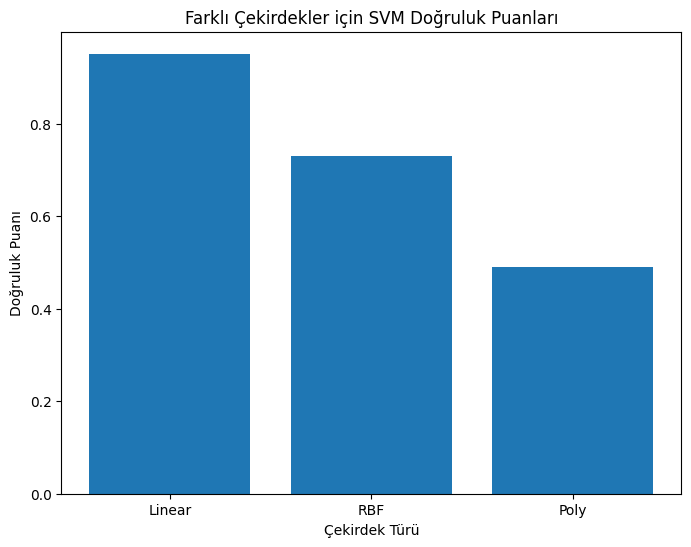

In [58]:
accuracies = [linear_accuracy, rbf_accuracy, poly_accuracy]
kernels = ['Linear', 'RBF', 'Poly']
plt.figure(figsize = (8, 6))
plt.bar(kernels, accuracies)
plt.xlabel('Çekirdek Türü')
plt.ylabel('Doğruluk Puanı')
plt.title('Farklı Çekirdekler için SVM Doğruluk Puanları')
plt.show()

# LightGBM sınıflandırma modelini eğitme ve test verileri üzerinde tahmin yapma

In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20)

In [60]:
clf = lgb.LGBMClassifier()
clf.fit(X_train2, y_train2)

LGBMClassifier()

In [61]:
y_pred2 = clf.predict(X_test2)

In [62]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test2, y_pred2)))

LightGBM Model accuracy score: 0.9932


In [63]:
y_pred_train = clf.predict(X_train2)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train2, y_pred_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test2, y_test2)))

Training-set accuracy score: 0.9929
Test set score: 0.9932


In [64]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4281
           1       1.00      1.00      1.00      4440
           2       1.00      1.00      1.00      4085
           3       1.00      1.00      1.00      4151
           4       1.00      1.00      1.00      3786
           5       1.00      1.00      1.00      3126
           6       1.00      1.00      1.00      2602
           7       1.00      1.00      1.00      1520
           8       1.00      1.00      1.00      1393
           9       1.00      1.00      1.00      1203
          10       1.00      1.00      1.00      1216
          11       0.82      1.00      0.90      1147
          12       1.00      1.00      1.00       962
          13       1.00      1.00      1.00       953
          14       1.00      1.00      1.00       825
          15       1.00      1.00      1.00       822
          16       1.00      1.00      1.00       425
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K-En Yakın Komşu (KNN) sınıflandırma modelini eğitme ve test verileri üzerinde tahmin yapma

In [65]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=1)

In [66]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train3, y_train3)

    train_scores.append(knn.score(X_train3, y_train3))
    test_scores.append(knn.score(X_test3, y_test3))

In [67]:
y_pred3 = knn.predict(X_test3)

In [68]:
test_scores_mean = np.mean(test_scores)
train_scores_mean = np.mean(train_scores)
print("Test Score Mean: {:.2f}".format(test_scores_mean))
print("Train Score Mean: {:.2f}".format(train_scores_mean))

Test Score Mean: 0.99
Train Score Mean: 0.99


In [69]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4314
           1       1.00      1.00      1.00      4244
           2       1.00      1.00      1.00      4127
           3       1.00      1.00      1.00      4069
           4       1.00      1.00      1.00      3830
           5       1.00      1.00      1.00      3090
           6       1.00      1.00      1.00      2697
           7       1.00      1.00      1.00      1541
           8       1.00      1.00      1.00      1397
           9       1.00      1.00      1.00      1246
          10       1.00      1.00      1.00      1241
          11       0.81      1.00      0.90      1145
          12       1.00      1.00      1.00       971
          13       1.00      1.00      1.00       925
          14       1.00      1.00      1.00       837
          15       1.00      1.00      1.00       821
          16       1.00      1.00      1.00       430
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gaussian, Bernoulli ve Multinomial Naive Bayes modellerini eğitme ve test verileri üzerinde tahmin yapma

In [70]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, stratify = y, train_size = 0.80)
X_test4, X_valid4, y_test4, y_valid4 = train_test_split(X_test4, y_test4, stratify = y_test4, train_size = 0.5)
X_train4.shape, X_test4.shape, X_valid4.shape, y_train4.shape, y_test4.shape, y_valid4.shape

((148760, 4), (18595, 4), (18595, 4), (148760,), (18595,), (18595,))

In [71]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train4, y_train4)

GaussianNB()

In [72]:
gaussian_cv = cross_validate(estimator=gaussian_nb,
                             X = X_valid4, y = y_valid4,
                             scoring = 'accuracy', cv = 5,
                             return_train_score = True)
gaussian_mean_train_score = round((gaussian_cv['train_score'] * 100).mean(), 3)
gaussian_mean_test_score = round((gaussian_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {gaussian_mean_train_score}')
print(f'Mean test score: {gaussian_mean_test_score}')

Mean train score: 93.185
Mean test score: 93.111


In [73]:
gaussian_predict = gaussian_nb.predict(X_test4)
print(classification_report(y_test4, gaussian_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2190
           1       1.00      1.00      1.00      2166
           2       1.00      1.00      1.00      2064
           3       1.00      1.00      1.00      2058
           4       1.00      1.00      1.00      1888
           5       0.86      1.00      0.92      1555
           6       1.00      1.00      1.00      1332
           7       1.00      0.65      0.79       751
           8       1.00      1.00      1.00       684
           9       1.00      1.00      1.00       623
          10       1.00      1.00      1.00       618
          11       0.00      0.00      0.00       552
          12       1.00      1.00      1.00       480
          13       1.00      1.00      1.00       473
          14       1.00      1.00      1.00       413
          15       1.00      1.00      1.00       410
          16       1.00      1.00      1.00       207
          17       0.10    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train4, y_train4)

BernoulliNB()

In [75]:
bernoulli_cv = cross_validate(estimator = bernoulli_nb,
                              X = X_valid4, y = y_valid4,
                             cv=10, return_train_score=True)
bernoulli_mean_train_score = round((bernoulli_cv['train_score'] * 100).mean(), 3)
bernoulli_mean_test_score = round((bernoulli_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {bernoulli_mean_train_score}')
print(f'Mean test score: {bernoulli_mean_test_score}')

Mean train score: 11.783
Mean test score: 11.783


In [76]:
bernoulli_predict = gaussian_nb.predict(X_test4)
print(classification_report(y_test4, bernoulli_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2190
           1       1.00      1.00      1.00      2166
           2       1.00      1.00      1.00      2064
           3       1.00      1.00      1.00      2058
           4       1.00      1.00      1.00      1888
           5       0.86      1.00      0.92      1555
           6       1.00      1.00      1.00      1332
           7       1.00      0.65      0.79       751
           8       1.00      1.00      1.00       684
           9       1.00      1.00      1.00       623
          10       1.00      1.00      1.00       618
          11       0.00      0.00      0.00       552
          12       1.00      1.00      1.00       480
          13       1.00      1.00      1.00       473
          14       1.00      1.00      1.00       413
          15       1.00      1.00      1.00       410
          16       1.00      1.00      1.00       207
          17       0.10    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train4, y_train4)

MultinomialNB()

In [78]:
multinomial_cv = cross_validate(estimator = multinomial_nb,
                               X = X_valid4, y = y_valid4,
                               cv = 10, return_train_score = True)
multinomial_mean_train_score = round((multinomial_cv['train_score'] * 100).mean(), 3)
multinomial_mean_test_score = round((multinomial_cv['test_score'] * 100).mean(), 3)
print(f'Mean train score: {multinomial_mean_train_score}')
print(f'Mean test score: {multinomial_mean_test_score}')

Mean train score: 34.922
Mean test score: 34.821


In [79]:
multinomial_predict = multinomial_nb.predict(X_test4)
print(classification_report(y_test4, multinomial_predict))

              precision    recall  f1-score   support

           0       0.33      0.58      0.42      2190
           1       0.36      0.42      0.39      2166
           2       0.62      0.62      0.62      2064
           3       0.61      0.42      0.50      2058
           4       0.00      0.00      0.00      1888
           5       0.39      0.46      0.42      1555
           6       0.36      0.62      0.45      1332
           7       0.00      0.00      0.00       751
           8       0.19      0.37      0.25       684
           9       0.18      0.22      0.20       623
          10       0.13      0.13      0.13       618
          11       0.37      0.09      0.14       552
          12       0.05      0.06      0.06       480
          13       0.37      0.67      0.48       473
          14       0.19      0.14      0.16       413
          15       0.00      0.00      0.00       410
          16       0.00      0.00      0.00       207
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


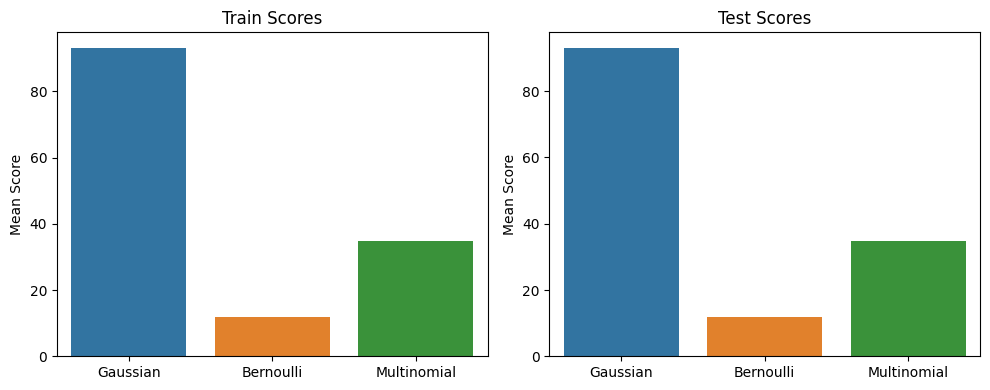

In [80]:
mean_train_scores = pd.DataFrame(data = [[gaussian_mean_train_score,
                                        bernoulli_mean_train_score,
                                        multinomial_mean_train_score]],
                                 columns = ['Gaussian', 'Bernoulli', 'Multinomial'])
mean_test_scores = pd.DataFrame(data = [[gaussian_mean_test_score,
                                      bernoulli_mean_test_score,
                                      multinomial_mean_test_score]],
                                 columns = ['Gaussian', 'Bernoulli', 'Multinomial'])
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.barplot(data = mean_train_scores, ax = ax[0])
ax[0].set_title('Train Scores')
sns.barplot(data = mean_test_scores, ax=ax[1])
ax[1].set_title('Test Scores')
ax[0].set_ylabel('Mean Score')
ax[1].set_ylabel('Mean Score')
plt.tight_layout()
plt.show()


# Sonuç

In [81]:
#sonuç kısmı yanlış gaussian kesin yanlış diğerlerini incele

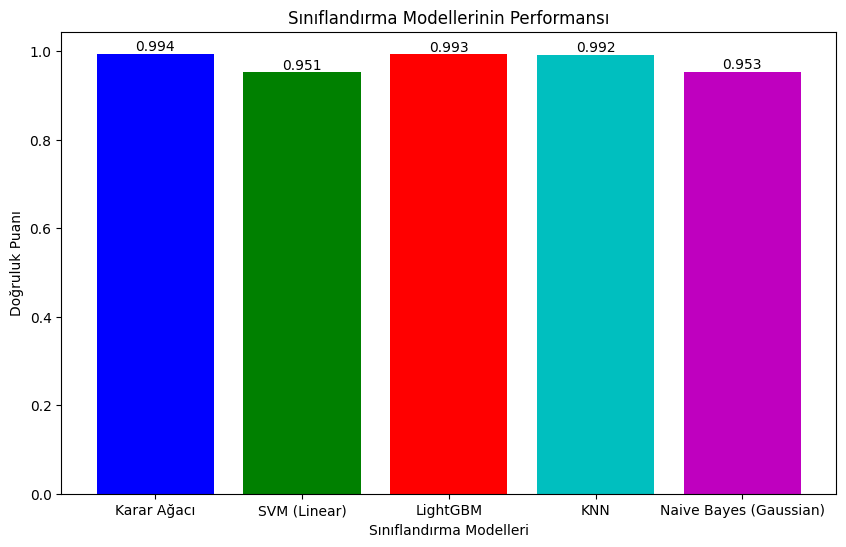

In [82]:
performanslar = []
performanslar.append(metrics.accuracy_score(y_test, y_pred))
performanslar.append(metrics.accuracy_score(y_test1, y_pred_linear))
performanslar.append(metrics.accuracy_score(y_test2, y_pred2))
performanslar.append(metrics.accuracy_score(y_test3, y_pred3))
performanslar.append(metrics.accuracy_score(y_test4, gaussian_predict))
modeller = ['Karar Ağacı', 'SVM (Linear)', 'LightGBM', 'KNN', 'Naive Bayes (Gaussian)']
renkler = ['b', 'g', 'r', 'c', 'm']
plt.figure(figsize=(10, 6))
plt.bar(modeller, performanslar, color = renkler)
for i in range(len(modeller)):
    plt.text(i, performanslar[i], round(performanslar[i], 3), ha = 'center', va = 'bottom')
plt.xlabel('Sınıflandırma Modelleri')
plt.ylabel('Doğruluk Puanı')
plt.title('Sınıflandırma Modellerinin Performansı')
plt.show()